In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:f}'.format

In [75]:
full_df = pd.read_csv('Telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


## Choose RV for analysis

In [13]:
features = ['rev_Mean', 'totmrc_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'roam_Mean', 'drop_vce_Mean', 'lor', 'hnd_price', 'area']

df = full_df[features].dropna()
df['area'] = df['area'].astype('category').cat.rename_categories(range(1, df['area'].nunique() + 1)).astype('int')
df

,rev_Mean,totmrc_Mean,ovrmou_Mean,ovrrev_Mean,roam_Mean,drop_vce_Mean,lor,hnd_price,area
0,23.997500,22.500000,0.000000,0.000000,0.000000,0.666667,15.000000,149.989990,14
2,16.990000,16.990000,0.000000,0.000000,0.000000,0.333333,7.000000,29.989990,7
3,38.000000,38.000000,0.000000,0.000000,0.000000,0.000000,6.000000,29.989990,4
4,55.230000,71.980000,0.000000,0.000000,0.000000,9.666667,5.000000,149.989990,11
5,82.275000,75.000000,0.000000,0.000000,0.000000,52.000000,1.000000,129.989990,7
...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990000,1.000000,0.390000,0.390000,12.000000,10.000000,199.989990,9
99985,71.993333,70.000000,4.333333,1.083333,0.910000,14.333333,12.000000,29.989990,9
99986,117.490000,29.990000,250.000000,87.500000,0.000000,4.000000,1.000000,59.989990,9
99990,29.990000,29.990000,0.000000,0.000000,0.000000,0.666667,15.000000,29.989990,9


## Step 1. Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV .

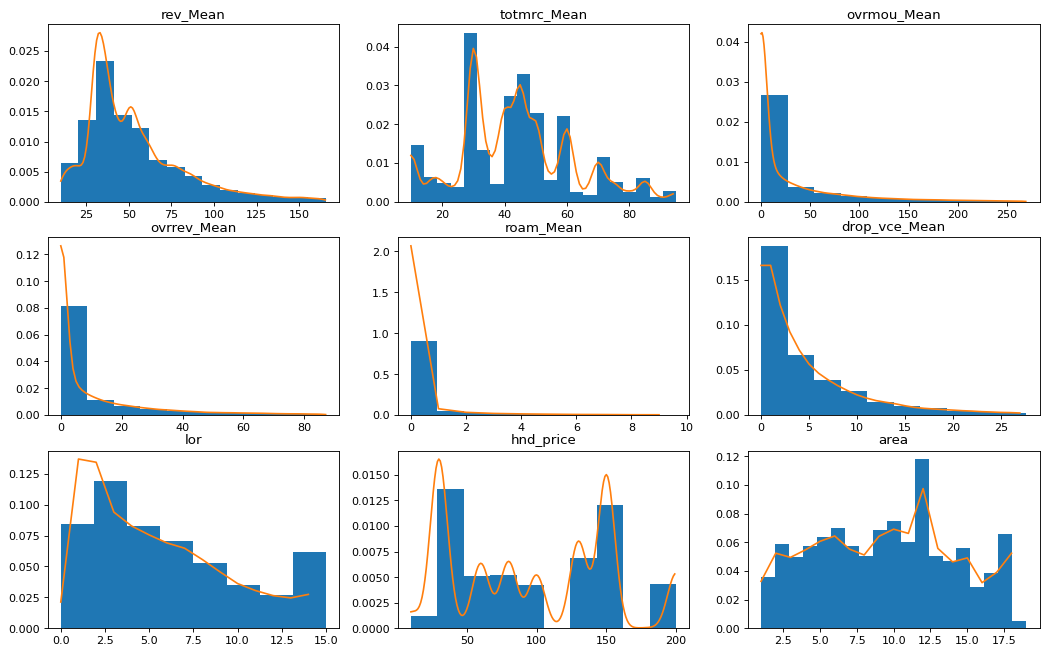

In [14]:
from scipy.stats import gaussian_kde, trimboth

def plot(feature, bins, index):
    plt.subplot(index)
    data = df[feature].dropna()
    d = data.to_numpy()
    d = trimboth(d, 0.025)
    plt.hist(d, bins=bins, density=True)

    kde = gaussian_kde(d)
    tiks = np.arange(d.min(), d.max(), 1)
    plt.plot(tiks, kde(tiks) )

    plt.title("%s" % feature)
plt.figure(figsize=(16, 10), dpi=80)
plot('rev_Mean', 15, 331)
plot('totmrc_Mean', 20, 332)
plot('ovrmou_Mean', 10, 333)
plot('ovrrev_Mean', 10, 334)
plot('roam_Mean', 10, 335)
plot('drop_vce_Mean', 10, 336)
plot('lor', 8, 337)
plot('hnd_price', 10, 338)
plot('area', 19, 339)

## Step 2. Estimation of multivariate mathematical expectation and variance.

In [15]:
df['rev_Mean'].mean()

56.212073544769225

In [16]:
df['rev_Mean'].var()

2027.8433607671861

## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

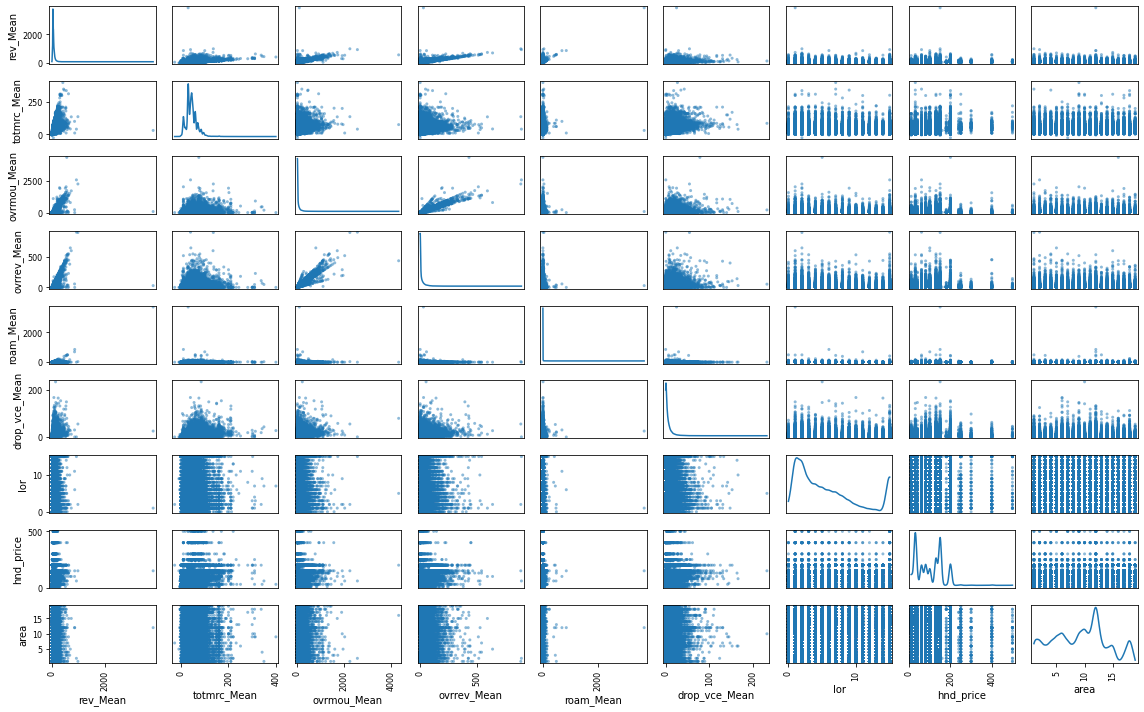

In [37]:
pd.plotting.scatter_matrix(df, figsize=(16, 10), diagonal='kde')
plt.tight_layout()
plt.show()

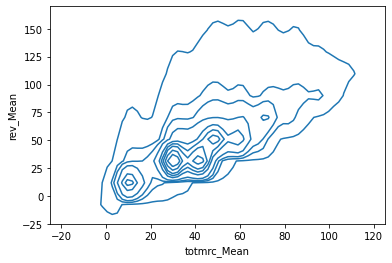

In [9]:
sns.kdeplot(data=df, x='totmrc_Mean', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-25, 125])
ax.set_ylim([-25, 170])
plt.show()

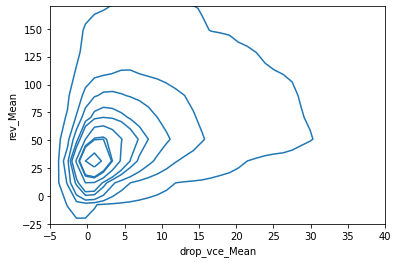

In [10]:
sns.kdeplot(data=df, x='drop_vce_Mean', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-5, 40])
ax.set_ylim([-25, 170])
plt.show()

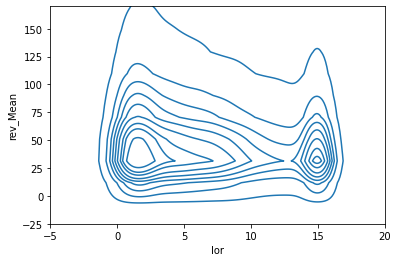

In [11]:
sns.kdeplot(data=df, x='lor', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-5, 20])
ax.set_ylim([-25, 170])
plt.show()

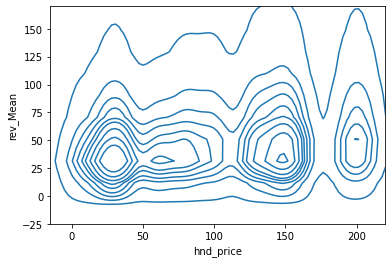

In [26]:
sns.kdeplot(data=df, x='hnd_price', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-15, 220])
ax.set_ylim([-25, 170])
plt.show()

1 Mean = 57.90951940929874 Var = 2205.6545944877435
2 Mean = 57.50424159606996 Var = 2107.36677308915
3 Mean = 60.16763564003573 Var = 2264.8923539502252
4 Mean = 57.57925788193657 Var = 1939.0552431831363
5 Mean = 55.981739443173396 Var = 1684.2320536675566
6 Mean = 55.30769204153172 Var = 1681.4367684712797
7 Mean = 56.53272722992371 Var = 1770.6537388624558
8 Mean = 57.71739593339417 Var = 1706.0103720658328
9 Mean = 57.59970312139475 Var = 1976.03367812457
10 Mean = 53.42043563045514 Var = 1500.0569939034988
11 Mean = 52.878093640987395 Var = 1510.8767955250448
12 Mean = 59.52773165848212 Var = 4057.607152320926
13 Mean = 52.255723543250966 Var = 1381.5046534710061
14 Mean = 52.99803235968041 Var = 1530.432723324994
15 Mean = 53.0058445978237 Var = 1705.7430656618728
16 Mean = 55.31230946990945 Var = 1692.493946393869
17 Mean = 58.508157384305896 Var = 1941.0847714386043
18 Mean = 54.87692790921517 Var = 1720.7374809718244
19 Mean = 56.259528967669624 Var = 1727.9312952104576


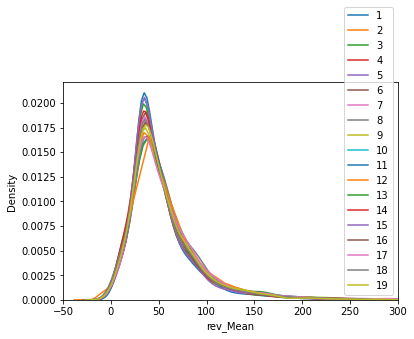

In [48]:
regions = np.unique(df['area'])
for region in regions:
    data = df[df['area'] == region]['rev_Mean']
    print(region, "Mean =", data.mean(), "Var =", data.var())
    sns.kdeplot(data, label=region)
ax = plt.gca()
ax.set_xlim([-50, 300])
plt.legend()
plt.show()

## Step 4. Estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [17]:
df.corr()

,rev_Mean,totmrc_Mean,ovrmou_Mean,ovrrev_Mean,roam_Mean,drop_vce_Mean,lor,hnd_price,area
rev_Mean,1.000000,0.602067,0.752557,0.757452,0.410209,0.428434,-0.056105,0.171664,-0.019884
totmrc_Mean,0.602067,1.000000,0.199956,0.165957,0.037500,0.355919,-0.053479,0.233407,-0.025533
ovrmou_Mean,0.752557,0.199956,1.000000,0.953820,0.033677,0.348496,-0.036824,0.089895,-0.011902
ovrrev_Mean,0.757452,0.165957,0.953820,1.000000,0.032287,0.335846,-0.037606,0.091383,-0.013861
roam_Mean,0.410209,0.037500,0.033677,0.032287,1.000000,0.044435,-0.008056,0.015943,0.001176
drop_vce_Mean,0.428434,0.355919,0.348496,0.335846,0.044435,1.000000,-0.032689,0.153856,0.016752
lor,-0.056105,-0.053479,-0.036824,-0.037606,-0.008056,-0.032689,1.000000,-0.038911,0.000356
hnd_price,0.171664,0.233407,0.089895,0.091383,0.015943,0.153856,-0.038911,1.000000,-0.014172
area,-0.019884,-0.025533,-0.011902,-0.013861,0.001176,0.016752,0.000356,-0.014172,1.000000


<AxesSubplot:>

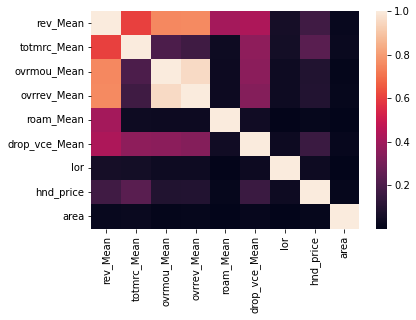

In [29]:
sns.heatmap(np.abs(df.corr()))

In [47]:
from scipy.stats import pearsonr, norm

def pearsonr_ci(x, y, alpha=0.05):
    r, _ = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    z = norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, lo, hi

features = df.columns
n = len(features)
for i in range(n):
    for j in range(i + 1, n):
        cc, low, high = pearsonr_ci(df[features[i]], df[features[j]])
        print("CC [%f, %f] (%s, %s)" % (low, high, features[i], features[j]))

CC [0.597287, 0.606804] (rev_Mean, totmrc_Mean)
CC [0.749302, 0.755775] (rev_Mean, ovrmou_Mean)
CC [0.754252, 0.760616] (rev_Mean, ovrrev_Mean)
CC [0.403982, 0.416398] (rev_Mean, roam_Mean)
CC [0.422321, 0.434509] (rev_Mean, drop_vce_Mean)
CC [-0.063543, -0.048662] (rev_Mean, lor)
CC [0.164411, 0.178899] (rev_Mean, hnd_price)
CC [-0.027344, -0.012422] (rev_Mean, area)
CC [0.192780, 0.207111] (totmrc_Mean, ovrmou_Mean)
CC [0.158690, 0.173206] (totmrc_Mean, ovrrev_Mean)
CC [0.030045, 0.044951] (totmrc_Mean, roam_Mean)
CC [0.349383, 0.362420] (totmrc_Mean, drop_vce_Mean)
CC [-0.060918, -0.046033] (totmrc_Mean, lor)
CC [0.226338, 0.240452] (totmrc_Mean, hnd_price)
CC [-0.032990, -0.018073] (totmrc_Mean, area)
CC [0.953141, 0.954488] (ovrmou_Mean, ovrrev_Mean)
CC [0.026220, 0.041130] (ovrmou_Mean, roam_Mean)
CC [0.341922, 0.355036] (ovrmou_Mean, drop_vce_Mean)
CC [-0.044276, -0.029369] (ovrmou_Mean, lor)
CC [0.082486, 0.097293] (ovrmou_Mean, hnd_price)
CC [-0.019365, -0.004439] (ovrmou_Mean

## Step 5. Task formulation for regression. Estimate multivariate correlation (target-predictors).

[Coefficient of multiple correlation](https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation)

In [164]:
reg_df = full_df[['rev_Mean', 'totmrc_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'roam_Mean', 'drop_vce_Mean']].dropna()
X, y = reg_df[['totmrc_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'roam_Mean', 'drop_vce_Mean']], reg_df['rev_Mean']

In [165]:
cxx = X.corr().to_numpy()
cxy = np.array([pearsonr(X[feature], y)[0] for feature in ['totmrc_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'roam_Mean', 'drop_vce_Mean']])
np.dot(np.dot(cxy.T, np.linalg.inv(cxx)), cxy)

0.9419757985191688

## Step 6. Regression model and analysis of multicollinearity and regularization 

In [166]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [169]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.9396488527419574
RMSE 11.01160668572832


We tried to use only one of 2 highly correlated features, but the reseult became worse.

In [170]:
X_ = reg_df[['totmrc_Mean', 'ovrrev_Mean', 'roam_Mean', 'drop_vce_Mean']]
X_ = StandardScaler().fit(X_).transform(X_)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.33, random_state=42)
reg_ = LinearRegression().fit(X_train_, y_train_)
y_pred_ = reg_.predict(X_test_)
print("R2  ", r2_score(y_test, y_pred_))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_)))

R2   0.9390637432616674
RMSE 11.064857159462242


In [171]:
from sklearn.linear_model import Lasso

reg_ = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred = reg_.predict(X_test)
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.9396503515433339
RMSE 11.011469950020063


          rev_Mean
count 32883.000000
mean      6.285933
std       9.041128
min       0.000018
25%       2.023310
50%       4.653965
75%       7.184863
max     366.689505


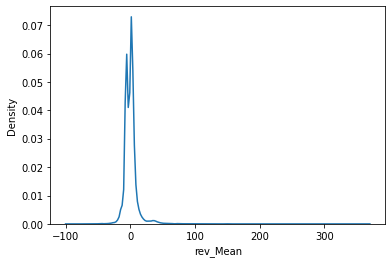

In [180]:
ax = plt.gca()
y_diff = y_test - y_pred
print(pd.DataFrame(np.abs(y_diff)).describe())
sns.kdeplot(y_diff)
plt.show()